In [13]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt

In [14]:
np.random.seed(45)
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

In [15]:
torch.manual_seed(45)

# TASK - 1.1

In [16]:
# Use torch.autograd to find the true gradient on the above dataset using linear regression (in the form θ 1 x + θ 0 ) for any given values of ( θ 0 , θ 1 ) .

# Convert numpy arrays to tensors
x1_tensor = torch.tensor(x1, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.float)

# Initialize model parameters
theta0 = torch.tensor(np.random.randn(1), requires_grad=True)
theta1 = torch.tensor(np.random.randn(1), requires_grad=True)

# Define the model
def model(x):
    return theta0 + theta1 * x

# Define the loss function
def loss_fn(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

# Compute the output
y_pred = model(x1_tensor)

# Compute the loss
loss = loss_fn(y_pred, y_tensor)

# Backpropagate to compute the gradients
loss.backward()

# Print the true gradients
true_gradients = (theta0.grad.item(), theta1.grad.item())
print("True gradients:", true_gradients)

True gradients: (-8.112874022576571, -0.23752171009715195)


# TASK-1.2

In [17]:
theta0.grad.zero_()
theta1.grad.zero_()

# Calculate stochastic gradients for each data point
grad_theta0_list = []
grad_theta1_list = []

for i in range(num_samples):
    y_pred_single = model(x1_tensor[i])  # Model prediction for a single point
    loss_single = loss_fn(y_pred_single, y_tensor[i])  # Loss for that single point

    # Backpropagate to calculate gradients
    loss_single.backward(retain_graph=True)

    # Store the gradients
    grad_theta0_list.append(theta0.grad.item())
    grad_theta1_list.append(theta1.grad.item())

    # Reset the gradients for the next iteration
    theta0.grad.zero_()
    theta1.grad.zero_()

# Average the stochastic gradients
avg_grad_theta0 = np.mean(grad_theta0_list)
avg_grad_theta1 = np.mean(grad_theta1_list)

print("Average stochastic gradients:", (avg_grad_theta0, avg_grad_theta1))

# Compare with true gradients
print("Difference in gradients (theta0):", true_gradients[0] - avg_grad_theta0)
print("Difference in gradients (theta1):", true_gradients[1] - avg_grad_theta1)
print()
relative_error_theta0 = abs((true_gradients[0] - avg_grad_theta0) / true_gradients[0])
relative_error_theta1 = abs((true_gradients[1] - avg_grad_theta1) / true_gradients[1])
print("Relative error for theta0:", relative_error_theta0)
print("Relative error for theta1:", relative_error_theta1)

Average stochastic gradients: (-8.11287402257657, -0.237521710097152)
Difference in gradients (theta0): -1.7763568394002505e-15
Difference in gradients (theta1): 5.551115123125783e-17

Relative error for theta0: 2.1895530911203481e-16
Relative error for theta1: 2.3370979944760616e-16


**We can observe that the values of true_gradients and average stochastic gradients are very close.** Hence stochastic gradient is a good estimate of the true gradient.

#TASK- 1.3

In [18]:
# #Def Contour Plotting and Loss Function
def plot_contour(X, Y, Z, filled=True, path=[]):
    plt.figure(figsize=(12, 8))
    contour = plt.contour(X, Y, Z, levels=50, cmap='plasma')

    if filled:
        plt.contourf(X, Y, Z, levels=50, alpha=0.5, cmap='plasma')

    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], marker='o', color='red', markersize=5, linestyle='-', linewidth=1)
    plt.plot([], [], color='red', label='Trajectory')

    plt.colorbar(label='Loss')
    plt.xlabel('Theta0')
    plt.ylabel('Theta1')
    plt.title('Contour Plot of Loss Function')
    plt.legend()
    plt.grid(True)
    plt.show()


def f(x, y, x1, f_y):
    constant = 0
    for i in range(len(x1)):
        constant += (f_y[i] ** 2)
    coeff_x2 = num_samples
    coeff_y2 = 0
    for i in range(len(x1)):
        coeff_y2 += (x1[i] ** 2)
    coeff_x = 0
    for i in range(len(x1)):
        coeff_x += 2 * f_y[i]
    coeff_y = 0
    for i in range(len(x1)):
        coeff_y += 2 * f_y[i] * x1[i]
    coeff_xy = 0
    for i in range(len(x1)):
        coeff_xy += 2 * x1[i]
    return (constant + coeff_x2 * x ** 2 + coeff_y2 * y ** 2 - coeff_x * x - coeff_y * y + coeff_xy * x * y) / num_samples

In [19]:
#Finding Optimal Theta
import numpy as np
num_samples=40
np.random.seed(45)
x1 = np.random.uniform(-1, 1, num_samples).astype(np.float32)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples).astype(np.float32)
y = f_x + eps

# Theta=()
X_b = np.c_[np.ones((x1.shape[0], 1)), x1]
optimal_theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
Optimal_Theta0 = optimal_theta[0]
Optimal_Theta1 = optimal_theta[1]
print("Optimal theta0:", Optimal_Theta0)
print("Optimal theta1:", Optimal_Theta1)

Optimal theta0: 3.95070641725477
Optimal theta1: 2.6824689564558795


In [20]:
def GD_calculator(x1,y,Optimal_Theta0,Optimal_Theta1,method):
  np.random.seed(45)
  a=np.random.randint(100)
  torch.manual_seed(a)
  X1 = torch.tensor(x1, requires_grad=False).unsqueeze(1)
  Ground_Truth = torch.tensor(y).unsqueeze(1)
  num_samples=40
  learning_rates = torch.tensor([0.0001, 0.001, 0.01, 0.1, 1, 10], requires_grad=False)

  Optimal_Theta0 = torch.tensor(Optimal_Theta0, requires_grad=False)
  Optimal_Theta1 = torch.tensor(Optimal_Theta1, requires_grad=False)
  Optimal_learning_rate=0
  prev_epoch_count=1000000000000000
  for alpha in learning_rates:
    Theta0_tensor = torch.randn(1, requires_grad=True)
    Theta1_tensor = torch.randn(1, requires_grad=True)
    learning_rate=alpha
    number_of_epochs=0
    number_of_iters=0
    if(method=='SGD'):
      while(torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
        indices = torch.randperm(num_samples)
        X1_shuffled = X1[indices]
        y_shuffled = Ground_Truth[indices]

        for i in range(num_samples):
          Theta0_tensor.grad=None
          Theta1_tensor.grad=None

          X = Theta1_tensor * X1_shuffled[i] + Theta0_tensor

          individual_loss = loss_fn(X, y_shuffled[i])

          individual_loss.backward(retain_graph=True)

          with torch.no_grad():
            Theta0_tensor -= learning_rate * Theta0_tensor.grad
            Theta1_tensor -= learning_rate * Theta1_tensor.grad
            number_of_iters+=1
        number_of_epochs+=1
    elif(method=='FBGD'):
        number_of_batches=1
        while(torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
          indices = torch.randperm(num_samples)
          X1_shuffled = X1[indices]
          y_shuffled = Ground_Truth[indices]
          batch_size = num_samples // number_of_batches
          for i in range(number_of_batches):
            start = i * batch_size
            end = (i + 1) * batch_size

            X_batch = X1_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            Theta0_tensor.grad=None
            Theta1_tensor.grad=None

            X = Theta1_tensor *X_batch + Theta0_tensor

            individual_loss = loss_fn(X, y_batch)
            individual_loss=individual_loss.mean()
            individual_loss.backward()

            with torch.no_grad():
              Theta0_tensor -= learning_rate * Theta0_tensor.grad
              Theta1_tensor -= learning_rate * Theta1_tensor.grad
              number_of_iters+=1
          number_of_epochs+=1
    elif(method=='MBGD'):
        number_of_batches=5
        while(torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
          indices = torch.randperm(num_samples)
          X1_shuffled = X1[indices]
          y_shuffled = Ground_Truth[indices]
          batch_size = num_samples // number_of_batches
          for i in range(number_of_batches):
            start = i * batch_size
            end = (i + 1) * batch_size

            X_batch = X1_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            Theta0_tensor.grad=None
            Theta1_tensor.grad=None

            X = Theta1_tensor *X_batch + Theta0_tensor

            individual_loss = loss_fn(X, y_batch)
            individual_loss=individual_loss.mean()
            individual_loss.backward()

            with torch.no_grad():
              Theta0_tensor -= learning_rate * Theta0_tensor.grad
              Theta1_tensor -= learning_rate * Theta1_tensor.grad
              number_of_iters+=1
          number_of_epochs+=1
    if(number_of_epochs<prev_epoch_count and not np.isnan(Theta0_tensor.item()) and not np.isnan(Theta1_tensor.item())):
        prev_epoch_count=number_of_epochs
        Optimal_learning_rate= learning_rate.item()
  return Optimal_learning_rate
print("Optimal learning rate for SGD =",GD_calculator(x1,y,Optimal_Theta0,Optimal_Theta1,'SGD'))
print("Optimal learning rate for FBGD =",GD_calculator(x1,y,Optimal_Theta0,Optimal_Theta1,'FBGD'))
print("Optimal learning rate for MBGD =",GD_calculator(x1,y,Optimal_Theta0,Optimal_Theta1,'MBGD'))


Optimal learning rate for SGD = 0.009999999776482582
Optimal learning rate for FBGD = 0.10000000149011612
Optimal learning rate for MBGD = 0.10000000149011612


In [21]:
def avg_loss(a,b):
  loss=0
  for i in range(len(a)):
    loss+=(a[i] - b[i]) ** 2
  return loss/len(a)

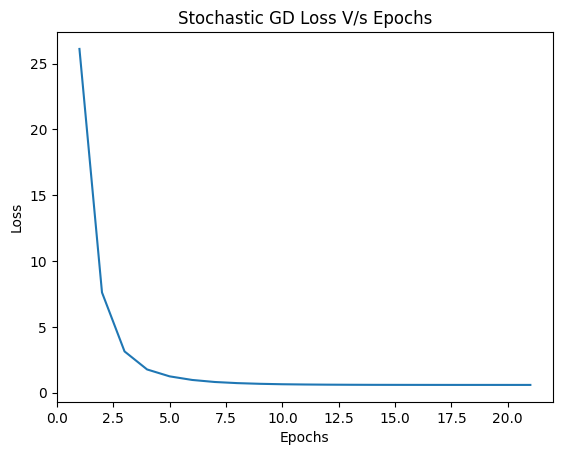

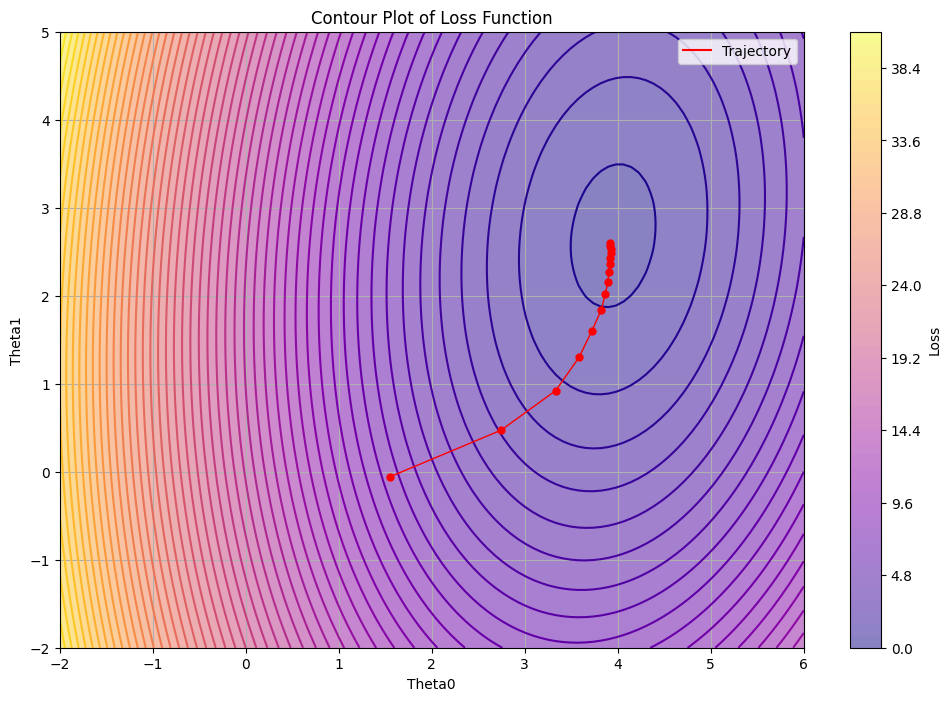

Average Iterations= 717.6666666666666
Average Epochs= 18.2


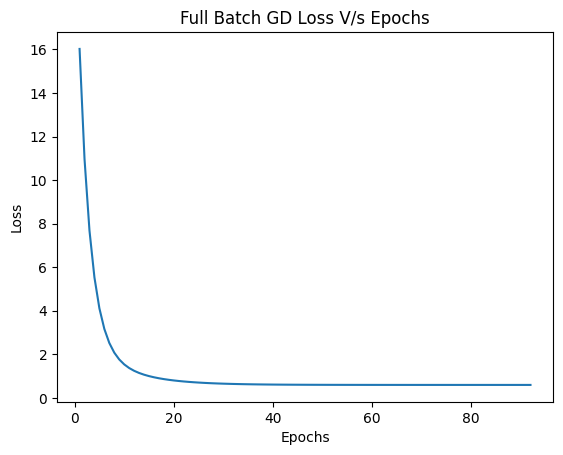

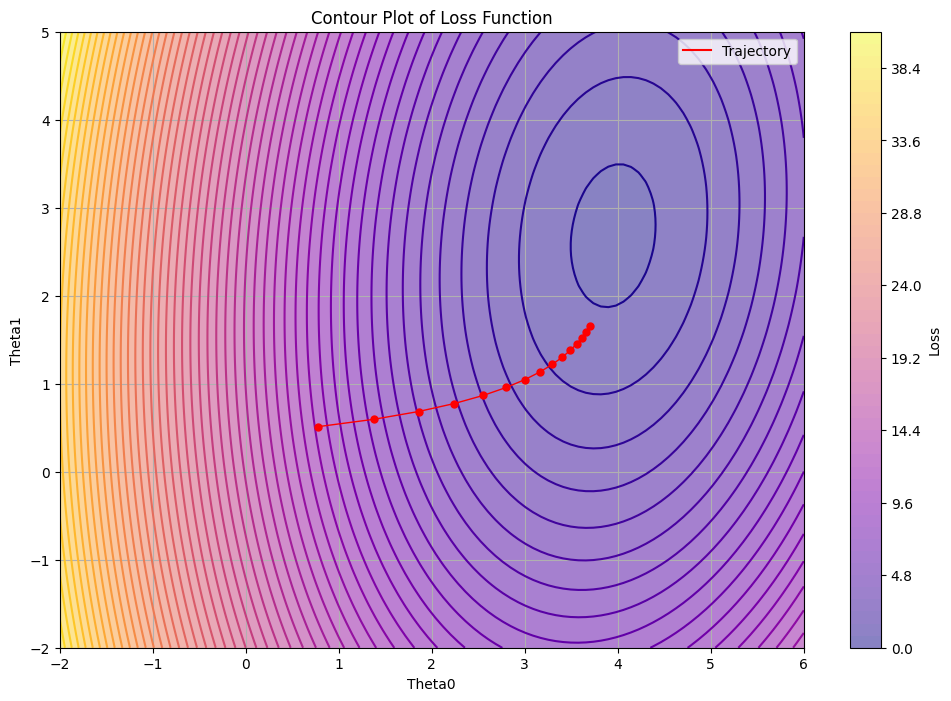

Average Iterations= 89.53333333333333
Average Epochs= 89.53333333333333


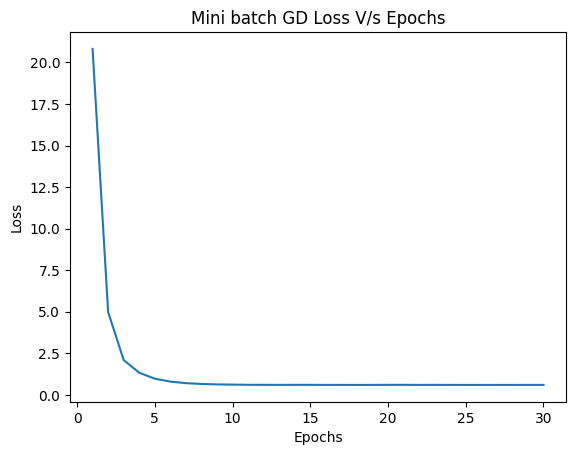

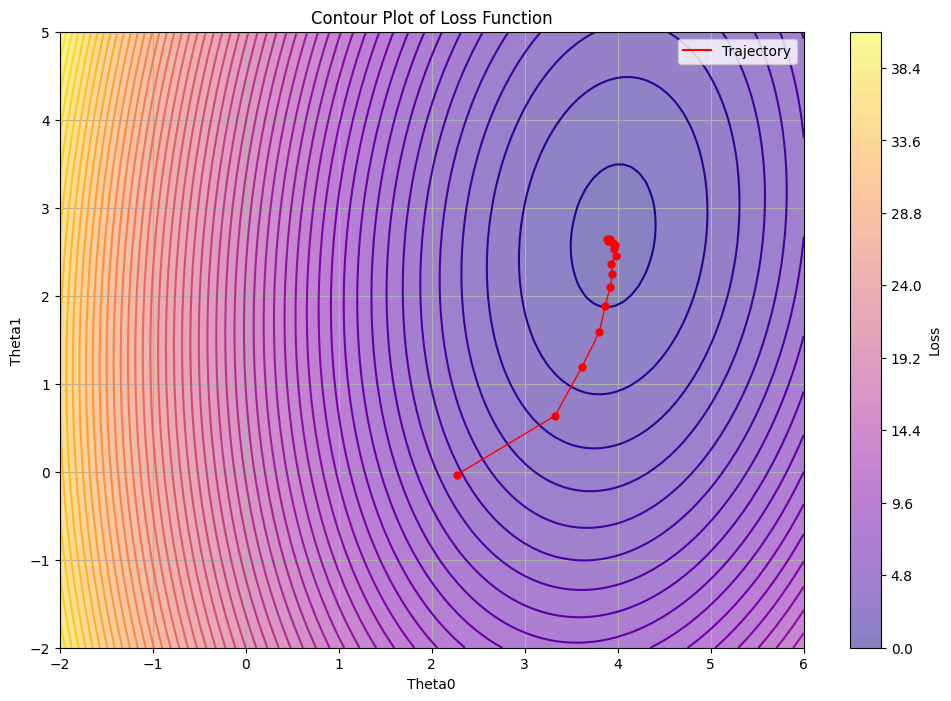

Average Iterations= 135.66666666666666
Average Epochs= 27.133333333333333


In [22]:
def plotting_loss_and_contour(x1,y,method):
  np.random.seed(45)

  Theta0 = np.linspace(-2,6, 100)
  Theta1 = np.linspace(-2,5, 100)

  X1 = torch.tensor(x1, requires_grad=False).unsqueeze(1)
  Ground_Truth = torch.tensor(y).unsqueeze(1)

  learning_rate = GD_calculator(x1,y,Optimal_Theta0,Optimal_Theta1,method)
  iter_count=0
  epoch_count=0

  for r in range(15):
    number_of_epochs=0
    Theta0_tensor = torch.randn(1, requires_grad=True)
    Theta1_tensor = torch.randn(1, requires_grad=True)
    history=[]
    losses_list=[]

    F_x=(Theta0_tensor.item()+Theta1_tensor.item()*X1)
    previous_loss=(avg_loss(F_x,Ground_Truth))
    if(method=='SGD'):
      while(torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
        indices = torch.randperm(num_samples)
        X1_shuffled = X1[indices]
        y_shuffled = Ground_Truth[indices]

        for i in range(num_samples):
          if((Theta0_tensor-Optimal_Theta0)<=0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)<=0.001):
            break
          Theta0_tensor.grad=None
          Theta1_tensor.grad=None

          X = Theta1_tensor * X1_shuffled[i] + Theta0_tensor

          individual_loss = loss_fn(X, y_shuffled[i])

          individual_loss.backward(retain_graph=True)

          with torch.no_grad():
            Theta0_tensor -= learning_rate * Theta0_tensor.grad
            Theta1_tensor -= learning_rate * Theta1_tensor.grad
            iter_count+=1
        if(len(history)<15):
          history.append((Theta0_tensor.item(), Theta1_tensor.item()))
        graphing_loss=previous_loss
        losses_list.append(graphing_loss.detach().numpy())
        previous_loss=avg_loss(Theta0_tensor+Theta1_tensor*X1_shuffled,y_shuffled)
        number_of_epochs+=1
        epoch_count+=1

    elif(method=='FBGD'):
        number_of_batches=1
        while(torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
          indices = torch.randperm(num_samples)
          X1_shuffled = X1[indices]
          y_shuffled = Ground_Truth[indices]
          batch_size = num_samples // number_of_batches
          for i in range(number_of_batches):
            if(torch.abs(Theta0_tensor-Optimal_Theta0)<=0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)<=0.001):
              break
            start = i * batch_size
            end = (i + 1) * batch_size

            X_batch = X1_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            Theta0_tensor.grad=None
            Theta1_tensor.grad=None

            X = Theta1_tensor *X_batch + Theta0_tensor

            individual_loss = loss_fn(X, y_batch)
            individual_loss=individual_loss.mean()
            individual_loss.backward()

            with torch.no_grad():
              Theta0_tensor -= learning_rate * Theta0_tensor.grad
              Theta1_tensor -= learning_rate * Theta1_tensor.grad
              iter_count+=1
          if(len(history)<15):
            history.append((Theta0_tensor.item(), Theta1_tensor.item()))
          graphing_loss=previous_loss
          losses_list.append(graphing_loss.detach().numpy())
          previous_loss=avg_loss(Theta0_tensor+Theta1_tensor*X1_shuffled,y_shuffled)
          number_of_epochs+=1
          epoch_count+=1

    elif(method=='MBGD'):
        number_of_batches=5
        while(torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
          indices = torch.randperm(num_samples)
          X1_shuffled = X1[indices]
          y_shuffled = Ground_Truth[indices]
          batch_size = num_samples // number_of_batches
          for i in range(number_of_batches):
            if(torch.abs(Theta0_tensor-Optimal_Theta0)<=0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)<=0.001):
              break
            start = i * batch_size
            end = (i + 1) * batch_size

            X_batch = X1_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            Theta0_tensor.grad=None
            Theta1_tensor.grad=None

            X = Theta1_tensor *X_batch + Theta0_tensor

            individual_loss = loss_fn(X, y_batch)
            individual_loss=individual_loss.mean()
            individual_loss.backward()

            with torch.no_grad():
              Theta0_tensor -= learning_rate * Theta0_tensor.grad
              Theta1_tensor -= learning_rate * Theta1_tensor.grad
              iter_count+=1
          if(len(history)<15):
            history.append((Theta0_tensor.item(), Theta1_tensor.item()))
          graphing_loss=previous_loss
          losses_list.append(graphing_loss.detach().numpy())
          previous_loss=avg_loss(Theta0_tensor+Theta1_tensor*X1_shuffled,y_shuffled)
          number_of_epochs+=1
          epoch_count+=1


  x_axis=np.arange(1,number_of_epochs+1)
  y_axis=(losses_list)
  plt.plot(x_axis,y_axis)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  if (method=='SGD'):
    plt.title('Stochastic GD Loss V/s Epochs')
  elif(method=='FBGD'):
    plt.title('Full Batch GD Loss V/s Epochs')
  elif(method=='MBGD'):
    plt.title('Mini batch GD Loss V/s Epochs')

  x1_np = x1
  y_np = Ground_Truth.numpy()
  Theta0_np = Theta0_tensor.item()
  Theta1_np = Theta1_tensor.item()
  X, Y = np.meshgrid(Theta0, Theta1)
  Z = f(X, Y, x1_np, y_np)
  plot_contour(X, Y, Z, path=history)
  print("Average Iterations=",iter_count/15)
  print("Average Epochs=",epoch_count/15)

plotting_loss_and_contour(x1,y,'SGD')
plotting_loss_and_contour(x1,y,'FBGD')
plotting_loss_and_contour(x1,y,'MBGD')


#TASK-1.4

In [23]:
#Finding Optimal Momentum
learning_rate = 0.1
optimal_momentum = None
min_loss = float('inf')

momentum_values = np.linspace(0, 1, 100)
prev_number_of_epochs=1000000000000
for momentum in momentum_values:
    torch.manual_seed(45)
    iter_count = 0
    epoch_count = 0
    number_of_epochs = 0
    Theta0_tensor = torch.randn(1, requires_grad=True)
    Theta1_tensor = torch.randn(1, requires_grad=True)

    history = []
    change_0 = 0
    change_1 = 0

    previous_loss = float('inf')

    while (torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
        Theta0_tensor.grad = None
        Theta1_tensor.grad = None

        X = Theta1_tensor * torch.tensor(x1).unsqueeze(1) + Theta0_tensor
        individual_loss = loss_fn(X, torch.tensor(y).unsqueeze(1))
        individual_loss = individual_loss.mean()
        individual_loss.backward()

        with torch.no_grad():
            new_change_0 = learning_rate * Theta0_tensor.grad + momentum * change_0
            Theta0_tensor -= new_change_0
            change_0 = new_change_0

            new_change_1 = learning_rate * Theta1_tensor.grad + momentum * change_1
            Theta1_tensor -= new_change_1
            change_1 = new_change_1

            iter_count += 1

        current_loss = individual_loss.item()

        number_of_epochs += 1


    # Check if the loss is the minimal found
    if (number_of_epochs < prev_number_of_epochs and not torch.isnan(Theta0_tensor)):
        prev_number_of_epochs = number_of_epochs
        optimal_momentum = momentum

# Print the results
print(f"Optimal Momentum: {optimal_momentum}")

Optimal Momentum: 0.5858585858585859


LOSS FUNCTION FOR FULL BATCH


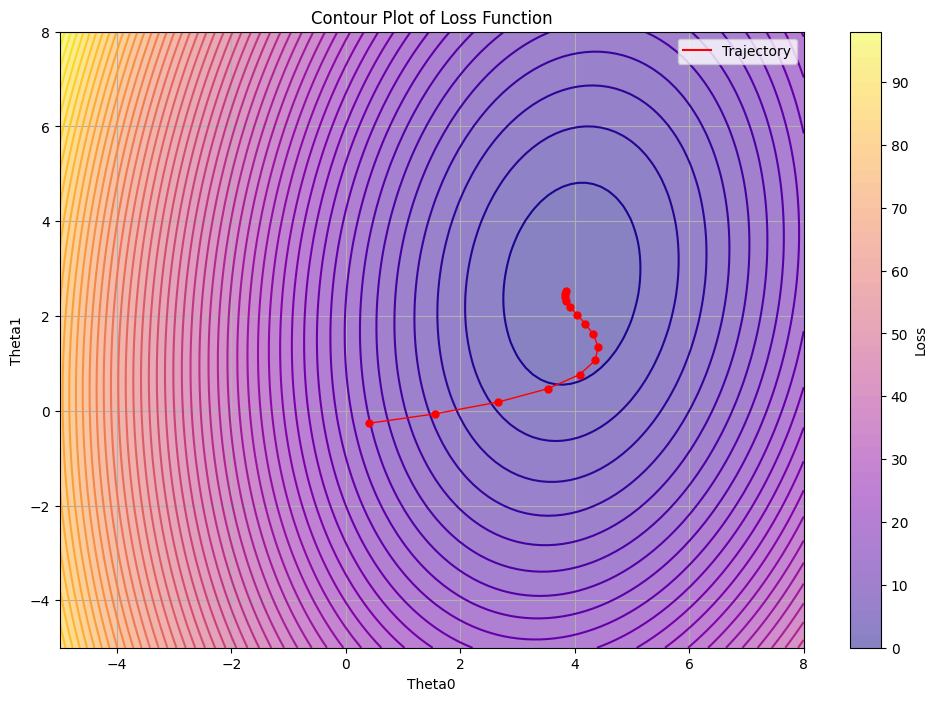

Theta0 = 3.9515392780303955 Theta1 = 2.6787803173065186
Average Iterations= 23.666666666666668
Average Epochs= 23.666666666666668


In [26]:
#Full Batch with Momentum Countour Plots till convergence
np.random.seed(45)
num_samples = 40

Theta0 = np.linspace(-5,8, 100)
Theta1 = np.linspace(-5,8, 100)

X1 = torch.tensor(x1, requires_grad=False).unsqueeze(1)
Ground_Truth = torch.tensor(y).unsqueeze(1)
learning_rate = 0.1
iter_count=0
epoch_count=0
for r in range(15):
  number_of_epochs=0
  Theta0_tensor = torch.randn(1, requires_grad=True)
  Theta1_tensor = torch.randn(1, requires_grad=True)
    # print('Initial Theta0=',Theta0_tensor,'Initial Theta1=',Theta1_tensor,'Learning rate=',Optimal_learning_rate)
  history=[]
  vectors=[]
  number_of_batches = 1
  number_of_epochs = 0

  F_x = (Theta0_tensor.item() + Theta1_tensor.item() * X1)
  previous_loss = avg_loss(F_x, Ground_Truth)
  net_loss = torch.tensor([10000000], requires_grad=False)

  change_0=0
  change_1=0
  momentum=0.59

  while (torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
    Theta0_tensor.grad=None
    Theta1_tensor.grad=None
    X = Theta1_tensor *X1 + Theta0_tensor
    individual_loss = loss_fn(X, Ground_Truth)
    individual_loss=individual_loss.mean()
    individual_loss.backward()

    with torch.no_grad():
            new_change_0 = learning_rate * Theta0_tensor.grad + momentum * change_0
            Theta0_tensor -= new_change_0
            change_0 = new_change_0
            new_change_1 = learning_rate * Theta1_tensor.grad + momentum * change_1
            Theta1_tensor -= new_change_1
            change_1 = new_change_1
            iter_count+=1
    grad0 = learning_rate * Theta0_tensor.grad.item()
    grad1 = learning_rate * Theta1_tensor.grad.item()
    mom0 = change_0.item()
    mom1 = change_1.item()
    if(len(history)<15):
            history.append((Theta0_tensor.item(), Theta1_tensor.item()))
            vectors.append((Theta0_tensor.item(), Theta1_tensor.item(), -grad0, -grad1, mom0, mom1))
    net_loss = avg_loss(Theta0_tensor + Theta1_tensor * X1_shuffled, y_shuffled) - previous_loss
    previous_loss = avg_loss(Theta0_tensor + Theta1_tensor * X1_shuffled, y_shuffled)
    # print("loss =", net_loss.item())
    number_of_epochs += 1
    epoch_count+=1

x1_np = x1
y_np = Ground_Truth.numpy()
Theta0_np = Theta0_tensor.item()
Theta1_np = Theta1_tensor.item()
X, Y = np.meshgrid(Theta0, Theta1)
Z = f(X, Y, x1_np, y_np)
print("LOSS FUNCTION FOR FULL BATCH")
plot_contour(X, Y, Z, filled=True, path=history)
print("Theta0 =", Theta0_tensor.item(), "Theta1 =", Theta1_tensor.item())
print("Average Iterations=",iter_count/15)
print("Average Epochs=",epoch_count/15)

In [25]:
#Finding Optimal Momentum
learning_rate = 0.01
optimal_momentum = None
min_loss = float('inf')

momentum_values = np.linspace(0, 1, 10)
prev_number_of_iters=1000000000000
for momentum in momentum_values:
    torch.manual_seed(45)
    iter_count = 0
    epoch_count = 0
    number_of_epochs = 0
    Theta0_tensor = torch.randn(1, requires_grad=True)
    Theta1_tensor = torch.randn(1, requires_grad=True)

    history = []
    change_0 = 0
    change_1 = 0

    previous_loss = float('inf')

    while (torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
        indices = torch.randperm(num_samples)
        X1_shuffled = X1[indices]
        y_shuffled = Ground_Truth[indices]

        for i in range(num_samples):

          Theta0_tensor.grad=None
          Theta1_tensor.grad=None

          X = Theta1_tensor * X1_shuffled[i] + Theta0_tensor

          individual_loss = loss_fn(X, y_shuffled[i])

          individual_loss.backward(retain_graph=True)

          with torch.no_grad():
            new_change_0 = learning_rate * Theta0_tensor.grad + momentum * change_0
            Theta0_tensor -= new_change_0
            change_0 = new_change_0
            new_change_1 = learning_rate * Theta1_tensor.grad + momentum * change_1
            Theta1_tensor -= new_change_1
            change_1 = new_change_1

            iter_count += 1

        number_of_epochs += 1

    if (iter_count < prev_number_of_iters and not torch.isnan(Theta0_tensor)):
        prev_number_of_iters = iter_count
        optimal_momentum = momentum

print(f"Optimal Momentum: {optimal_momentum}")

Optimal Momentum: 0.7777777777777777


LOSS FUNCTION FOR MINI BATCH


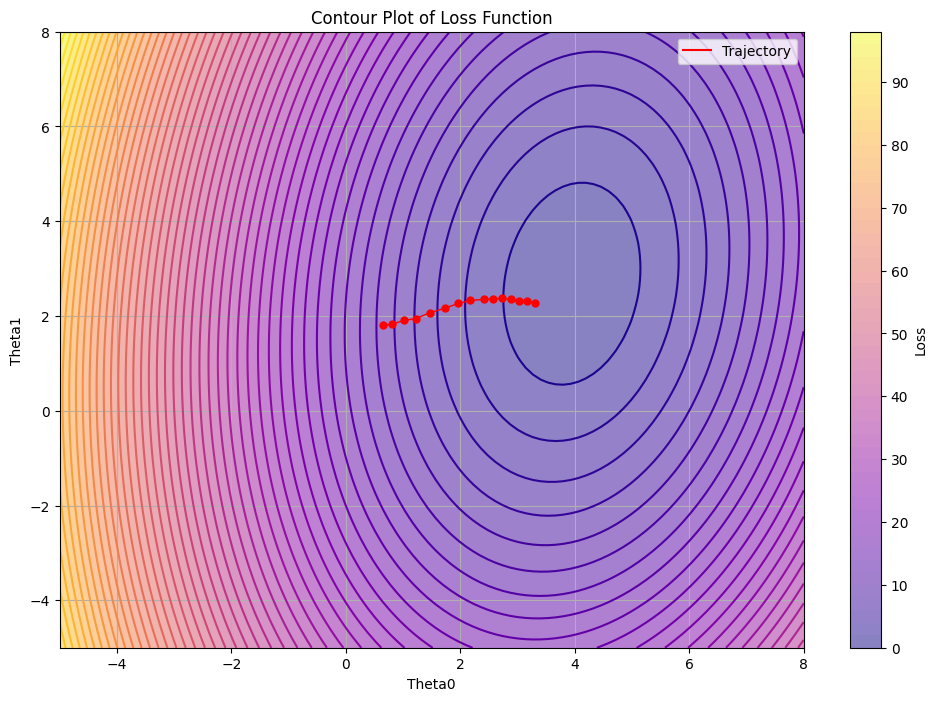

Theta0 = 3.9242496490478516 Theta1 = 2.6819114685058594
Average Iterations= 2276.733333333333
Average Epochs= 56.93333333333333


In [27]:
np.random.seed(45)
num_samples = 40

Theta0 = np.linspace(-5,8, 100)
Theta1 = np.linspace(-5,8, 100)

X1 = torch.tensor(x1, requires_grad=False).unsqueeze(1)
Ground_Truth = torch.tensor(y).unsqueeze(1)
learning_rate = 0.01
iter_count=0
epoch_count=0
for r in range(15):
  number_of_epochs=0
  Theta0_tensor = torch.randn(1, requires_grad=True)
  Theta1_tensor = torch.randn(1, requires_grad=True)
  history=[]
  vectors=[]
  number_of_batches = 1
  number_of_epochs = 0

  F_x = (Theta0_tensor.item() + Theta1_tensor.item() * X1)

  change_0=0
  change_1=0
  momentum=0.77

  while (torch.abs(Theta0_tensor-Optimal_Theta0)>0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)>0.001):
    Theta0_tensor.grad=None
    Theta1_tensor.grad=None
    X = Theta1_tensor *X1 + Theta0_tensor
    indices = torch.randperm(num_samples)
    X1_shuffled = X1[indices]
    y_shuffled = Ground_Truth[indices]

    for i in range(num_samples):
        if(torch.abs(Theta0_tensor-Optimal_Theta0)<=0.001 and torch.abs(Theta1_tensor-Optimal_Theta1)<=0.001):
          break
        Theta0_tensor.grad = None
        Theta1_tensor.grad = None

        X = Theta1_tensor * X1_shuffled[i] + Theta0_tensor
        individual_loss = loss_fn(X, y_shuffled[i])
        individual_loss.backward()

        with torch.no_grad():
            new_change_0 = learning_rate * Theta0_tensor.grad + momentum * change_0
            Theta0_tensor -= new_change_0
            change_0 = new_change_0
            new_change_1 = learning_rate * Theta1_tensor.grad + momentum * change_1
            Theta1_tensor -= new_change_1
            change_1 = new_change_1
            iter_count+=1
        grad0 = learning_rate * Theta0_tensor.grad.item()
        grad1 = learning_rate * Theta1_tensor.grad.item()
        mom0 = change_0.item()
        mom1 = change_1.item()
        if(len(history)<15):
            history.append((Theta0_tensor.item(), Theta1_tensor.item()))
            vectors.append((Theta0_tensor.item(), Theta1_tensor.item(), -grad0, -grad1, mom0, mom1))
    number_of_epochs += 1
    epoch_count+=1

x1_np = x1
y_np = Ground_Truth.numpy()
Theta0_np = Theta0_tensor.item()
Theta1_np = Theta1_tensor.item()
X, Y = np.meshgrid(Theta0, Theta1)
Z = f(X, Y, x1_np, y_np)
print("LOSS FUNCTION FOR MINI BATCH")
plot_contour(X, Y, Z, filled=True, path=history)
print("Theta0 =", Theta0_tensor.item(), "Theta1 =", Theta1_tensor.item())
print("Average Iterations=",iter_count/15)
print("Average Epochs=",epoch_count/15)